**Review**
	  
Hi, my name is Dmitry and I will be reviewing your project.
  
You can find my comments in colored markdown cells:
  
<div class="alert alert-success">
  If everything is done successfully.
</div>
  
<div class="alert alert-warning">
  If I have some (optional) suggestions, or questions to think about, or general comments.
</div>
  
<div class="alert alert-danger">
  If a section requires some corrections. Work can't be accepted with red comments.
</div>
  
Please don't remove my comments, as it will make further review iterations much harder for me.
  
Feel free to reply to my comments or ask questions using the following template:
  
<div class="alert alert-info">
  For your comments and questions.
</div>
  
First of all, thank you for turning in the project! You did an excellent job overall, there are just a couple of small problems that need to be fixed before the project is accepted. Good luck!


<div class="alert alert-info" role="alert">
Dear Reviewer,

<br>Nice to e-meet you. Thank you for reviewing my work.

<br>Rena Bracha
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Nice to meet you again, and you're welcome! :)
	  
</div>

<div class="alert alert-info" role="alert">
Hi Dmitry,

<br>Great to have you review my work again! I have gone over all your comments and (tried to) make corrections. The new comments are suffixed with "v.2" for ease of finding. It will be great if you could review them. Thank you. :)
    
<br>Rena

</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
You're welcome! Thanks for taking the time to improve the project! It's a pleasure to review your work, because you're always asking interesting questions and thinking outside the box! I tried to answer your questions as well as I could! The project is accepted now. Keep up the good work on the next sprint! :)
	  
</div>

# Zyfra Gold Extracted Amount Prediction by Machine Learning

We will analyse data provided by Zyfra on gold extraction from gold ore. Zyfra is a company that specialises in developing optimisation solutions for heavy industry. The raw dataset contains 22,716 records for 87 variables. 

We will prepare a prototype of a machine learning model for Zyfra that will help optimise the production and eliminate unprofitable parameters. We will also predict the amount of gold that can be extracted, given the volume of the gold ore. We have two objectives:

* Find the coefficient of each parameter in the equation that plots the best regression line that fits the real data to find the best combination of parameter coeffients that most efficiently extracts gold from gold ore.
* Predict two target variables: 'rougher.output.recovery' and 'final.output.recovery'. The former refers to the amount of gold recovered from the concentrate after the flotation stage but before the primary purification stage. The latter refers to the amount of gold recovered from the concentrate after both the primary and secondary purification stages. 


**Conclusion**
* The Linear Regression and KNeighborsRegressor models achieved performance above the baseline set by the constant model in terms of final sMAPE.
* The feature coefficients are displayed at the end of the project. 

## Tables of Contents <a class="anchor" id="table_of_contents"></a>

* [Data Loading](#chapter1)
    * [Libraries](#section_1_1)
    * [Data Files](#section_1_2)
* [Prepare the data](#chapter2)
    * [Open the files and look into the data](#section_2_1)
    * [Check that recovery is calculated correctly](#section_2_2)
    * [Analyze the features not available in the test set](#section_2_3)
    * [Perform data preprocessing](#section_2_4)
* [Analyze the data](#chapter3)
    * [Take note of how the concentrations of metals change](#section_3_1)
    * [Compare the feed particle size distributions in the training set and in the test set](#section_3_2)
    * [Consider the total concentrations of all substances at different stages](#section_3_3)
* [Build the model](#chapter3)
    * [Write a function to calculate the final sMAPE value](#section_4_1)
    * [Train different models](#section_4_2)

## Data Loading <a class="anchor" id="chapter1"></a>

[Go back to the Table of Contents](#table_of_contents)

### Libraries <a class="anchor" id="section_1_1"></a>

[Go back to the Table of Contents](#table_of_contents)

In [145]:
# import sys so no warnings will be issued
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# various libraries
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mth
from numpy import sqrt
from numpy import argmax
from numpy import mean
from numpy import absolute
from numpy import std

# sidetable utility package
!pip install sidetable
import sidetable


# for graph and chart plotting
import matplotlib.pyplot as plt
#!pip install -U seaborn
!pip install seaborn --upgrade
#!sudo pip3 install seaborn
#!pip install seaborn=0.11.2
import seaborn as sns
#from seaborn_qqplot import pplot
import statsmodels.api as sm

# for spliting the dataset for training, validation and testing
from sklearn.model_selection import train_test_split

# import the scikit-learn module for calculating various performance metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

# install imbalanced-learn library
# restart the kernel after running the installation so as not to get errors issued that sklearn.neighbor._base does not exist
!pip install -U scikit-learn
!pip install -U imbalanced-learn
#from imblearn.ensemble import EasyEnsembleClassifier
#from imblearn.under_sampling import NearMiss
#from imblearn.over_sampling import SMOTE

# for optimising hyperparameter
from sklearn.model_selection import GridSearchCV

# various classiers 
from sklearn.dummy import DummyClassifier # dummy classifier as a baseline
from sklearn.tree import DecisionTreeClassifier # decision tree classifier
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.linear_model import LogisticRegression # logistic regression classifier
from sklearn.ensemble import BaggingClassifier # Bagging classifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.dummy import DummyRegressor # dummy regressor as a baseline
from sklearn.linear_model import LinearRegression # linear regression classifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

# for label encoding
from sklearn.preprocessing import OrdinalEncoder

# for feature scaling by standardising the data
from sklearn.preprocessing import StandardScaler 

# for feature selection 
from sklearn.feature_selection import chi2 # categorical variables

# for imputing missing values
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

# for checking collinearity between features
!pip install collinearity
from collinearity import SelectNonCollinear
from sklearn.feature_selection import f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# for evaluating information gain for feature selection and feature importance
from sklearn.linear_model import LassoCV
from sklearn.linear_model import MultiTaskLasso
from sklearn.feature_selection import mutual_info_classif

# for performing cross validation
from sklearn.model_selection import RepeatedKFold

# for making a custom scorer
from sklearn.metrics import make_scorer

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.2)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: scikit-learn in /home/jovyan/.local/lib/python3.7/site-packages (1.0)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: imbalanced-learn in /home/jovyan/.local/lib/python3.7/site-packages (0.8.1)
Defaulting to user installation because normal site-packages is not writeable


### Data Files <a class="anchor" id="section_1_2"></a>

[Go back to the Table of Contents](#table_of_contents)

In [146]:
# enable data file loading in two environments: one local and one on the Platform
# automatically detect the delimiter in the csv file
# load the first 500 rows for starters
try:
    raw = pd.read_csv('gold_recovery_full.csv', sep = ',', nrows=500)
    train = pd.read_csv('gold_recovery_train.csv', sep = ',', nrows=500)
    test = pd.read_csv('gold_recovery_test.csv', sep = ',', nrows=500)
except:
    raw = pd.read_csv('/datasets/gold_recovery_full.csv', sep = ',', nrows=500)
    train = pd.read_csv('/datasets/gold_recovery_train.csv', sep = ',', nrows=500)
    test = pd.read_csv('/datasets/gold_recovery_test.csv', sep = ',', nrows=500)

In [147]:
# look at the first 5 rows
display(raw.head())
display(train.head())
display(test.head())

# check the data types
display(raw.info())
display(train.info())
display(test.info())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 87 columns):
date                                                  500 non-null object
final.output.concentrate_ag                           500 non-null float64
final.output.concentrate_pb                           500 non-null float64
final.output.concentrate_sol                          412 non-null float64
final.output.concentrate_au                           500 non-null float64
final.output.recovery                                 458 non-null float64
final.output.tail_ag                                  500 non-null float64
final.output.tail_pb                                  495 non-null float64
final.output.tail_sol                                 496 non-null float64
final.output.tail_au                                  500 non-null float64
primary_cleaner.input.sulfate                         476 non-null float64
primary_cleaner.input.depressant                      447 non-null floa

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 87 columns):
date                                                  500 non-null object
final.output.concentrate_ag                           500 non-null float64
final.output.concentrate_pb                           500 non-null float64
final.output.concentrate_sol                          412 non-null float64
final.output.concentrate_au                           500 non-null float64
final.output.recovery                                 458 non-null float64
final.output.tail_ag                                  500 non-null float64
final.output.tail_pb                                  495 non-null float64
final.output.tail_sol                                 496 non-null float64
final.output.tail_au                                  500 non-null float64
primary_cleaner.input.sulfate                         476 non-null float64
primary_cleaner.input.depressant                      447 non-null floa

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 53 columns):
date                                          500 non-null object
primary_cleaner.input.sulfate                 469 non-null float64
primary_cleaner.input.depressant              484 non-null float64
primary_cleaner.input.feed_size               500 non-null float64
primary_cleaner.input.xanthate                475 non-null float64
primary_cleaner.state.floatbank8_a_air        500 non-null float64
primary_cleaner.state.floatbank8_a_level      500 non-null float64
primary_cleaner.state.floatbank8_b_air        500 non-null float64
primary_cleaner.state.floatbank8_b_level      500 non-null float64
primary_cleaner.state.floatbank8_c_air        500 non-null float64
primary_cleaner.state.floatbank8_c_level      500 non-null float64
primary_cleaner.state.floatbank8_d_air        500 non-null float64
primary_cleaner.state.floatbank8_d_level      500 non-null float64
rougher.input.feed_ag    

None

* There are no long text values or potential categorical values. There will be no substantial savings in memory usages by converting the data types. 
* Convert the date variable to datetime data type.

In [148]:
# load the data files in full
# convert the 'date' variable to datetime data type
try:
    raw = pd.read_csv('gold_recovery_full.csv', sep=',', parse_dates=['date'])
    train = pd.read_csv('gold_recovery_train.csv', sep=',', parse_dates=['date'])
    test = pd.read_csv('gold_recovery_test.csv', sep=',', parse_dates=['date'])
except:
    raw = pd.read_csv('/datasets/gold_recovery_full.csv', sep=',', parse_dates=['date'])
    train = pd.read_csv('/datasets/gold_recovery_train.csv', sep=',', parse_dates=['date'])
    test = pd.read_csv('/datasets/gold_recovery_test.csv', sep=',', parse_dates=['date'])

## Prepare the data <a class="anchor" id="chapter2"></a>

[Go back to the Table of Contents](#table_of_contents)

### Open the files and look into the data <a class="anchor" id="section2_1"></a>

[Go back to the Table of Contents](#table_of_contents)

In [149]:
# get a first impression of the datasets
raw.info()
print()
train.info()
print()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null datetime64[ns]
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant     

* raw dataset's shape: 22716 rows, 87 columns
* training dataset's shape: 16860 rows, 87 columns 
* test dataset's shape: 5856 rows, 53 columns
* The training and test datasets are roughly in the ratio of 0.75 to 0.25 in terms of number of records. 
* There are missing values. We will look at this issue later on in more detail. 


* There are 34 (=87-53) less columns in the test dataset than in the training dataset. The test dataset contains only the input variables.  
* The target variables, 'rougher.output.recovery' and 'final.output.recovery', are absent from the test dataset. 
* The test dataset will be looked at in more detail later (see 1.3 "Analyze the features not available in the test set.").

In [150]:
# remove the display limit on the number of columns temporarily
pd.set_option('display.max_columns', None)

In [151]:
# check the descriptive statistics in the raw dataset
raw.describe(include='all')

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22716,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,21170.000000,22716.000000,21565.000000,22618.000000,22268.000000,21918.000000,22618.000000,22614.000000,22594.000000,22365.000000,22617.000000,22660.000000,22667.000000,22660.000000,22673.000000,22662.000000,22673.000000,22661.000000,22673.000000,2.267200e+04,2.267200e+04,2.267200e+04,21089.000000,22618.000000,22472.000000,22163.000000,22277.000000,22357.000000,22617.000000,21415.000000,22247.000000,22038.000000,20459.000000,22618.000000,22618.000000,22526.000000,22618.000000,19597.000000,19979.000000,22618.000000,19980.000000,19980.000000,22646.000000,22647.000000,22646.000000,22647.000000,22646.000000,22654.000000,22641.000000,22649.000000,22096.000000,22649.000000,22641.000000,22642.000000,22616.000000,22600.000000,20501.000000,22618.000000,22333.000000,22591.000000,22538.000000,22588.000000,22585.000000,22587.000000,22592.000000,22590.000000,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.0

* Depending on the model used, we may need to normalise the variables. 
* The raw dataset covers the period between 2016-01-15 00:00:00 and 2018-08-18 10:59:59. 
* All but 'primary_cleaner.state.floatbank8_d_air' and 'rougher.state.floatbank10_d_air' have mean and median that are fairly close to one anotherm indicating a symmetric normal distribution.


<br>Let us take a closer look at those two variables.

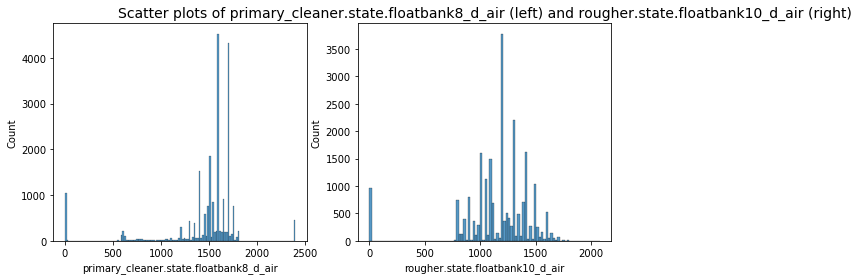

In [152]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(raw['primary_cleaner.state.floatbank8_d_air'], ax = ax[0])
sns.histplot(raw['rougher.state.floatbank10_d_air'], ax = ax[1])
plt.title("Scatter plots of primary_cleaner.state.floatbank8_d_air (left) and rougher.state.floatbank10_d_air (right)", fontsize=14)
plt.show();

* There are data points further away from the main clump of data points around the mean. However, without expert knowledge in gold extraction, we are not sure if these are considered outliers. So let us not remove them. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Fair enough!
	  
</div>

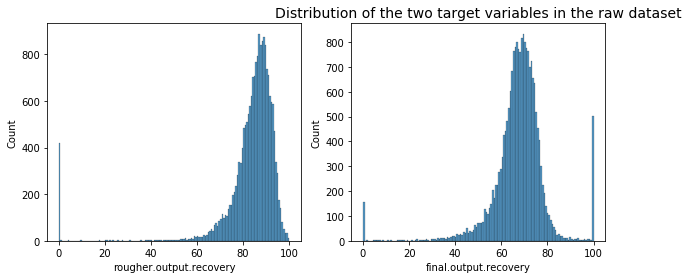

In [153]:
# look at the distributions of the two target variables in the raw dataset
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(raw['rougher.output.recovery'], ax = ax[0])
sns.histplot(raw['final.output.recovery'], ax = ax[1])
plt.title("Distribution of the two target variables in the raw dataset", fontsize=14)
plt.show();

* 'rougher.output.recovery' has a left-skewed distribution, suggesting that there are more low values. In fact, there are many data points around 0. Are these measurement errors or actually there was zero gold extracted from the ore at the time? 
* 'final.output.recovery' also has a left-skewed distribution, suggesting that there are more low values. Again, there are a lot of data points around 0 as well as around 100. 


<br>Since this project is a multi-output regression problem, let us check if the two target variables are independent from one another or not. The information will help us narrow down on the models we try out.

correlation coefficient:  0.32705873241331146


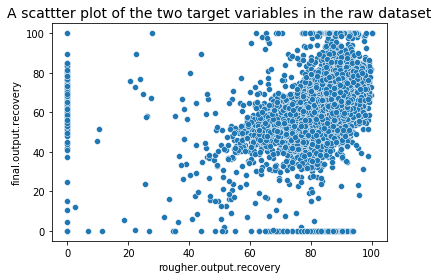

In [154]:
# check if the two target variables are dependent on one another
correlation = raw['rougher.output.recovery'].corr(raw['final.output.recovery'])
print('correlation coefficient: ', correlation)

sns.scatterplot(data=raw, x="rougher.output.recovery", y="final.output.recovery")
plt.title("A scattter plot of the two target variables in the raw dataset", fontsize=14)
plt.show();

* The two target variables do not have a particularly strong correlation. So we can say that they are independent from one another. 

In [155]:
# check the descriptive statistics of the training and test datasets
display(train.describe(include='all'))
display(test.describe(include='all'))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16860,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,15598.000000,16860.000000,15875.000000,16778.000000,16502.000000,16224.000000,16778.000000,16777.000000,16761.000000,16579.000000,16777.000000,16820.000000,16827.000000,16820.000000,16833.000000,16822.000000,16833.000000,16821.000000,16833.000000,1.683300e+04,1.683300e+04,1.683300e+04,15618.000000,16778.000000,16632.000000,16347.000000,16443.000000,16568.000000,16777.000000,15816.000000,16514.000000,16237.000000,14956.000000,16778.000000,16778.000000,16698.000000,16778.000000,14287.000000,14610.000000,16778.000000,14611.000000,14611.000000,16807.000000,16807.000000,16807.000000,16807.000000,16807.000000,16814.000000,16802.000000,16809.000000,16257.000000,16809.000000,16802.000000,16802.000000,16776.000000,16764.000000,14874.000000,16778.000000,16497.000000,16751.000000,16705.000000,16748.000000,16763.000000,16747.000000,16752.000000,16750.000000,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.0

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5856,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5816.000000,5834.000000,5789.000000,5840.000000,5599.000000,5733.000000,5801.000000,5503.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5839.000000,5840.000000,5836.000000,5840.000000,5833.000000,5840.000000,5822.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
unique,5856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2017-10-01 00:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,2016-09-01 00:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2017-12-31 23:59:59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,1486.398557,-510.723606,8.736170,3.552722,458.485472,55.937535,35.105834,8.700930,13.439933,6.169553,13.056047,6.423566,1016.294703,-404.977728,1270.598553,-482.154567,1253.495045,-480.945868,1169.675564,-482.152253,1018.386311,-476.

In [156]:
# reset the display limit
pd.reset_option('display.max_columns')

* The training and test datasets both seem to show a fairly symmetric normal distribution in all the variables. 
* Like in the raw dataset, the mean and median are further apart in 'primary_cleaner.state.floatbank8_d_air' and 'rougher.state.floatbank10_d_air', compared to other variables in the training dataset.  
* The training dataset seems to cover the same time period as the raw dataset (between 2016-01-15 00:00:00 and 2018-08-18 10:59:59), but the test dataset covers a different time period (between 2016-09-01 00:59:59 and 2017-12-31 23:59:59). 

<br>Let us visualise the periods covered by the three datasets. We will plot the graphs in terms of a variable that is present in all three datasets, 'rougher.input.feed_au'.

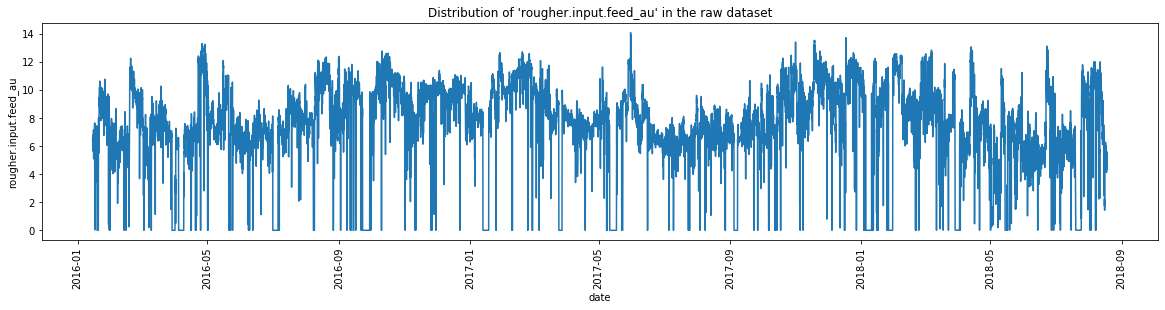

In [157]:
# plot the period covered by the raw dataset
plt.figure(figsize=(20, 4))
sns.lineplot(data=raw, x='date', y='rougher.input.feed_au')
plt.title("Distribution of 'rougher.input.feed_au' in the raw dataset")
plt.xticks(rotation=90)
plt.show();

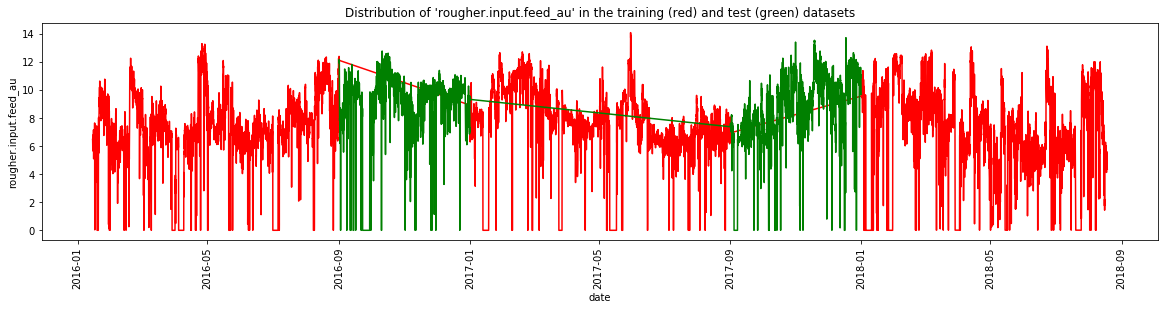

In [158]:
# plot the periods covered by the training and test datasets
plt.figure(figsize=(20, 4))
sns.lineplot(data=train, x='date', y='rougher.input.feed_au', color='r')
sns.lineplot(data=test, x='date', y='rougher.input.feed_au', color='g')
plt.title("Distribution of 'rougher.input.feed_au' in the training (red) and test (green) datasets")
plt.xticks(rotation=90)
plt.show();

* The training dataset covers the following periods:
<br>a) 2016-01-15 00:00 - 2016-08-31 23:59
<br>b) 2017-01-01 00:59 - 2017-08-31 23:59
<br>c) 2018-01-01 00:59 - 2018-08-18 10:59
* The test dataset covers the following periods:
<br>d) 2016-09-01 00:59 - 2016-12-31 23:59
<br>e) 2017-09-01 00:59 - 2017-12-31 23:59

* **Complete duplicates**

In [159]:
# check for complete duplicates while keeping the 'date' index column
raw.duplicated().sum()

0

* There are no complete duplicates.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The data was loaded and examined, you made some great observations!
	  
</div>

### Check that recovery is calculated correctly <a class="anchor" id="section_2_2"></a>

[Go back to the Table of Contents](#table_of_contents)



* **Using the training set, calculate recovery for the rougher.output.recovery feature.**

The components for calculating the rougher concentrate recovery ('rougher.output.recovery') are as below:
<br>o C='rougher.output.concentrate_au' (component3 in the flow chart in the Project Instructions)
<br>o F='rougher.input.feed_au' (component1)
<br>o T='rougher.output.tail_au' (component2)

In [160]:
# write a function that reflects the formula for calculating the rougher concentrate recovery
def calc_recovery(df, concentrate, feed, tailing):

    c = df[concentrate]
    f = df[feed]
    t = df[tailing]
    
    recovery = (c*(f-t))/(f*(c-t))*100
    return recovery

In [161]:
# calculate the rougher concentrate recovery
dataset = train
comp3 = 'rougher.output.concentrate_au'
comp1 = 'rougher.input.feed_au'
comp2 = 'rougher.output.tail_au'

train['rougher_recovery'] = calc_recovery(dataset, comp3, comp1, comp2)
train[['rougher.output.recovery', 'rougher_recovery']].head() # compare the provided against the calculated

,rougher.output.recovery,rougher_recovery
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794


* **Find the MAE between your calculations and the feature values.**

In [162]:
# write a function that calculates the Mean Absolute Error (MAE)
def calc_mae(df, tgt, calc):
    
    big_n = df.shape[0]
    y_i = df[tgt]
    y_hat = df[calc]
    
    mae = ((y_i - y_hat).abs()).sum() / big_n
    return mae

In [163]:
# calculate the MAE
dataset = train
target = 'rougher.output.recovery'
calculated = 'rougher_recovery'

print('MAE:', calc_mae(dataset, target, calculated))

MAE: 8.00350954615662e-15


* **Provide findings.**

The miniscule MAE figure suggests the difference between the provided and the calculated figures for the rougher concentrate recovery is negligible, confirming that the provided 'rougher.output.recovery' values are correct. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
`rougher.output.recovery` was validated successfully!
	  
</div>

**Addendum**

* **Using the training set, calculate recovery for the final.output.recovery feature.**

The components for calculating the final concentrate recovery ('final.output.recovery') are as below:
<br>o C='final.output.concentrate_au' (component8)
<br>o F='rougher.output.concentrate_au' (component3)
<br>o T='final.output.tail_au' (component7 - which corresponds to 'final.tail_au' in the flow chart)

In [164]:
# calculate the final concentrate recovery
dataset = train
comp8 = 'final.output.concentrate_au'
# comp3 = 'rougher.output.concentrate_au'
comp3 = 'rougher.input.feed_au'
comp7 = 'final.output.tail_au'

train['final_recovery'] = calc_recovery(dataset, comp8, comp3, comp7)
train[['final.output.recovery', 'final_recovery']].head() # compare the provided against the calculated

,final.output.recovery,final_recovery
0,70.541216,70.541216
1,69.266198,69.266198
2,68.116445,68.116445
3,68.347543,68.347543
4,66.927016,66.927016


* **Find the MAE between your calculations and the feature values.**

In [165]:
# calculate the MAE
dataset = train
target = 'final.output.recovery'
predictions = 'final_recovery'

print('MAE:', calc_mae(dataset, target, predictions))

MAE: 7.422267295306268e-15


* The difference between the provided 'final.output.recovery' and the calculated 'final_recovery' is large since for 'final.output.recovery', the median is 68.322258 and the mean is 67.447488. With an almost 50% margin of error, the provided 'final.output.recovery' does not seem to have been calculated correctly.  

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Two problems I can see:
  
1. For `F` the initial concentration (`rougher.input.feed_au`) should be used, not the intermediate concentration `rougher.output.concentrate_au`
2. The MAE was actually calculated between `target = 'final.output.recovery'` and `calculated = 'rougher_recovery'`
    
Fixing these should result in a similarly low MAE as for the `rougher.output.recovery`.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

2. Oops! I replaced 'calculated' to be 'predictions. 
<br>After the correction, if I keep comp3 = 'rougher.output.concentrate_au', I get MAE to be infinity (?!) If I use comp3 = 'rougher.input.feed_au', I can get a more reasonable MAE figure (MAE: 7.422267295306268e-15 above). 
    
The only qualm I have is the following:
    
1. In the Technological Process chapter of this Integrated Project II sprint on the Platform, it says, 
    
![F](F_for_finding_final_concentrate.PNG "F — share of gold in the concentrate right after flotation (for finding the final concentrate recovery)")
    
which I understood to be component (3) "rougher.output.concentrate_au" in the process flow:
    
![Gold Extraction Process Flow](process_flow.PNG "Gold extraction process flow")
    
That is why I used F = 'rougher.output.concentrate_au'. Does this mean that the Project Instruction is incorrect...?
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
> After the correction, if I keep comp3 = 'rougher.output.concentrate_au', I get MAE to be infinity
    
A division by 0 somewhere would explain such a result.
    
> Does this mean that the Project Instruction is incorrect...?
    
Well, judging by the fact that the recovery calculated using `F = 'rougher.input.feed_au'` is identical to the `final.output.recovery`, it is indeed incorrect :(
    
Although to be fair, the task doesn't mention `final.output.recovery`, so I guess the authors missed this. I think it's very reasonable to check the final recovery as well as rougher recovery though, so yeah, good catch!
	  
</div>

### Analyze the features not available in the test set <a class="anchor" id="section2_3"></a>

[Go back to the Table of Contents](#table_of_contents)

What are these parameters? What is their type?

In [166]:
# find which columns are absent from the test dataset compared to the training dataset
test_cols_absent = train.columns.difference(test.columns)
test_cols_absent

Index(['final.output.concentrate_ag', 'final.output.concentrate_au',
       'final.output.concentrate_pb', 'final.output.concentrate_sol',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au',
       'final.output.tail_pb', 'final.output.tail_sol', 'final_recovery',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au',
       'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol',
       'rougher.calculation.au_pb_ratio',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.output.concentrate_ag', 'rougher.output.concentrate_au',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_so

* There are 34 (=87-53) less columns in the test dataset than in the training dataset. Since the shapes of the two datasets are different, the models will most likely issue an error. 
* Our target variables, 'rougher.output.recovery' and 'final.output.recovery', are absent from the test dataset. 
* The rest of the features are product parameters ('output') and calculation characteristics ('calculation') taken from various stages of the gold extraction process. 
* In order to build a lean and efficient prediction model, the variables between the start and the end of the process are supposedly redundant. This is all the more so true for variables which are the result of a calculation. 


Note: 'rougher_recovery' and 'final_recovery' are variables created in step 1.3 above to calculate the rougher concentrate recovery and final concentrate recovery, and therefore, were not originally in the training dataset. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Yeah, more importantly, these features can cause target leakage (because most of them are based on the results of the process, and we're trying to make the predictions before the process is finished)
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

Got it!
    
</div>

### Perform data preprocessing <a class="anchor" id="section2_4"></a>

[Go back to the Table of Contents](#table_of_contents)

* **Training and test datasets must have the same shape**

The test dataset contains only the input variables, and is missing the two target variables. It is different in shape from the training dataset by 34 columns. The features used to train the models must be identical to those in the test dataset, otherwise, the models will isssue an error when trying to make predictions on the test dataset. 

We will match the training dataset to the test dataset by:
* removing from the training dataset the columns that are absent in the test dataset, and
* adding the two target variables to the test dataset. 

To do the above efficiently, we will handle the missing values in the full raw dataset then split it to training and test datasets by explicitly indexing the 'date' variable so we have the same composition of records as the original training and test datasets.

In [167]:
# create the list of column names to be removed from the training dataset except the two target variables
cols2remove = test_cols_absent.drop(['rougher.output.recovery', 'final.output.recovery']).tolist()
train_lean = train.drop(cols2remove, axis=1) # 55 columns; 16860 rows - unchanged
train_lean.shape

(16860, 55)

In [168]:
# create the list of column names to be added to the test dataset
cols2add = ['date', 'rougher.output.recovery', 'final.output.recovery']

# get the datetime indices of the test dataset
test_index = test.date

# extract the data from the two columns of the raw dataset
temp = raw[raw['date'].isin(test_index)][cols2add]

# merge the two dataframes
test_mended = pd.merge(test, temp, on='date', how='left')
test_mended.shape # 55 columns - the same shape as the training dataset; 5856 rows - unchanged

(5856, 55)

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Targets were merged to the test set correctly
	  
</div>

* **Missing values**

In [169]:
# look at the proportion of missing values in each column in the training dataset
train_lean.stb.missing(style=True)

,missing,total,percent
rougher.output.recovery,"2,573","16,860",15.26%
rougher.input.floatbank11_xanthate,"1,904","16,860",11.29%
final.output.recovery,"1,521","16,860",9.02%
primary_cleaner.input.sulfate,"1,307","16,860",7.75%
primary_cleaner.input.depressant,"1,262","16,860",7.49%
rougher.input.floatbank10_sulfate,"1,044","16,860",6.19%
primary_cleaner.input.xanthate,985,"16,860",5.84%
rougher.input.floatbank11_sulfate,623,"16,860",3.70%
rougher.state.floatbank10_e_air,603,"16,860",3.58%
rougher.input.feed_rate,513,"16,860",3.04%


**Target variables in the training dataset**
* In the training dataset, the two target variables contain missing values. 
<br>o 'rougher.output.recovery' accounts for 15.26% of the missing values. 
<br>o 'final.output.recovery' accounts for 9.02% of the missing values.  
* Of the 54/52 columns in the training and test datasets respectively, almost all contain missing values. 
* We have a way of calculating 'rougher.output.recovery' very accurately, but that is just one variable out of many, and only about 10% of the missing values in the variable can be filled by this method (i.e. about 350 rows), so the imputation process will be very inefficient. The same tactic will not work on 'final.output.recovery' - judging from the poor MAE score, the calculated recovery figures will not be representative of the provided data. 
* Imputing is tantamount to "(educated) guessing". Intuitively, testing a model's performance against "guesstimated target" does not seem like a good idea, since those guesstimates themselves could be inaccurate. 
* We will remove the missing values. 


**Feature variables in the training dataset**
* We are dealing with time series data. In the majority of the variables, the values increase or decrease at a fairly regular interval in chronological sequence. In the training dataset provided, the values in the majority of the variables seem to increase then decrease alternately on an hourly basis. We will use backward fill then forward fill to impute the missing values with the non-empty value that is immediately after (bfill) or before it (ffill). 

In [170]:
# remove the missing values from the two target variables
train_no_missvals = train_lean.dropna(subset=['rougher.output.recovery', 'final.output.recovery'])
train_no_missvals.shape[0] # a 16.08% data loss (16860-14149=2711) 

14149

In [171]:
# backward fill the missing values then forward fill to catch any remaining missing values
train_no_missvals = train_lean.fillna(method='ffill').fillna(method='bfill')
# train_no_missvals.isna().sum() # no more missing values

* There are no more missing values in the training dataset. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, missing values in the targets were dropped, and missing values in other features were filled using a reasonable method
	  
</div>

In [172]:
# look at the proportion of missing values in each column of the test dataset
test_mended.stb.missing(style=True)

,missing,total,percent
rougher.output.recovery,546,"5,856",9.32%
final.output.recovery,442,"5,856",7.55%
rougher.input.floatbank11_xanthate,353,"5,856",6.03%
primary_cleaner.input.sulfate,302,"5,856",5.16%
primary_cleaner.input.depressant,284,"5,856",4.85%
rougher.input.floatbank10_sulfate,257,"5,856",4.39%
primary_cleaner.input.xanthate,166,"5,856",2.83%
rougher.input.floatbank10_xanthate,123,"5,856",2.10%
rougher.input.feed_sol,67,"5,856",1.14%
rougher.input.floatbank11_sulfate,55,"5,856",0.94%


* Luckily, the test dataset contains a relatively small number of missing values. 
* The test dataset is a holdout set of unseen data, and ideally should not be tampered with. 

<br>Let us remove the missing values rather than imputing them. 

In [173]:
test_no_missvals = test_mended.dropna()
#test_no_missvals.isna().sum() # no more missing values
test_no_missvals.shape[0] # a 10.71% data loss (5856-5229=473) 

5229

* There are no more missing values in the test dataset. 

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
While dropping the rows with missing values makes total sense (how can we check the model quality on the data that is not authentic?), dropping missing values in other column is not so clear cut: if this data is representative of the real world data, we might need to be able to work with it even if some values are missing (for example as a result of malfunction of some sensor). Your sentiment about not tampering with the test data is definitely a good one to have, but you can consider things like missing value imputation, scaling and so on a part of the pipeline (you just need to be careful so that the methods used don't require knowing the data from the future to make sense).
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

Technically, I know how to impute the missing values in the test dataset without causing data leakage - I impute only within the test dataset, using the statistic like the mean or the median calculated only within the test dataset, for instance. 

I just have not "cultivated the sense" as to how strict I ought to be so as not to tamper with the test dataset. If I could, I would have gone as far as leaving the missing values in the test dataset because the models have to be able to cope with real-world data with all its flaws and incompleteness. But I know that the models would not be able to handle missing values, so I had to get rid of them one way or another. 
    
But, you are right, I am being inconsistent, because I did scale the test dataset. 

<br>Are there criteria for knowing when imputation will be more appropriate than deleting the missing values in the test dataset? 
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
On the contrary, imputing the test set using statistics calculated on the test set *is* causing data leakage, because to do that, we'd have to know about the test data beforehand, and we don't (that's kind of the whole idea that the test set is the new data never seen by the model, what we do have access to is the train set). When we deploy the model, the data to make predictions on may come one by one, so then there will be no 'test set' to speak of, just a single example, and if some column is missing in that example, we'll have nothing to fill it with, unless we use something pre-calculated using previously seen data.
    
Scaling the test set is completely fine, as long as you use the statistics calculated on the train set (e.g. mean and standard deviation for standard scaling).
    
As for the criteria, well, the test set distribution just has to be sufficiently similar to the train set distribution, that's pretty much it. So if there will be real new examples with missing values which the model has to make predictions on, we better get ready for it by trying out imputations before we deploy the model :)
	  
</div>

* **Multicollinearity**

Let us check for multicollinearity to identify features that correlate too strongly with one another, leading to low model interpretability. Multicollinearity creates a problem in the multiple regression because the inputs are all influencing each other. Therefore, they are not actually independent, and it is difficult to test how much the combination of the independent variables affects the dependent variable, or outcome, within the regression model.


Due to the large number of columns, no scatter plots could be displayed for the training dataset. The processing took way too long and had to be manually terminated. The correlation heatmap was displayed but again, the display was too complex and not readable. 


So we will use a non-visual method, variance inflation factor (VIF). It measures how much the behaviour (variance) of an independent variable is influenced, or inflated, by its interaction/correlation with the other independent variables. The VIF is calculated for each independent variable. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.


Notes:
* The VIF function had trouble with the 'date' variable and missing values, so we are checking multicollonearity after the training dataset was cleaned and separated into features and target variables. 
* from collinearity import SelectNonCollinear - this is a library that checks and removes features that have collinearity above a certain threshold (e.g. 0.7). Its drawback is that the model references the target dataset during fitting - even if multicollinearity is something that concerns feature variables only - and could not handle our test dataset with two target variables. So it had to be run twice. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Cool, checking for multicollinearity makes sense if you care about interpretability!
	  
</div>

In [174]:
# separate the feature variables from target variables in the training dataset
X_train = train_no_missvals.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis=1)
y_train = train_no_missvals[['rougher.output.recovery', 'final.output.recovery']]

In [175]:
# remove the display limit on the number of columns temporarily
pd.set_option('display.max_rows', None)

In [176]:
# create a dataframe for storing the VIF ratios
vif_data = pd.DataFrame()
vif_data['feature'] = X_train.columns
  
# calculate the VIF for each feature
vif_data['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(len(X_train.columns))]
print(vif_data.sort_values(by='VIF', ascending=False))

                                       feature          VIF
4       primary_cleaner.state.floatbank8_a_air  1786.245290
7     primary_cleaner.state.floatbank8_b_level  1562.305109
6       primary_cleaner.state.floatbank8_b_air  1402.604251
5     primary_cleaner.state.floatbank8_a_level  1304.328068
27           rougher.state.floatbank10_c_level  1070.109178
9     primary_cleaner.state.floatbank8_c_level  1027.259075
31           rougher.state.floatbank10_e_level   989.309142
25           rougher.state.floatbank10_b_level   928.421001
24             rougher.state.floatbank10_b_air   648.319448
28             rougher.state.floatbank10_d_air   558.888466
47  secondary_cleaner.state.floatbank5_a_level   536.009608
29           rougher.state.floatbank10_d_level   466.000204
32             rougher.state.floatbank10_f_air   418.596149
30             rougher.state.floatbank10_e_air   393.862884
26             rougher.state.floatbank10_c_air   380.953882
33           rougher.state.floatbank10_f

In [177]:
# reset the display limit
pd.reset_option('display.max_rows')

* The first six features have a VIF ratio of over 1000, so they must show a very strong collinearity, and should probaly be removed.

Let us check the feature importance so as not to remove important variables. 

**Feature selection by feature importance**

Due to the large number of variables present in the training dataset, we will see which features can be dropped to save computational resources.

We will evaluate the information gain of each variable in the context of the target variable.

In [178]:
# silence SettingWithCopyWarning that may arise from standardising features
pd.options.mode.chained_assignment = None

In [179]:
# create an instance of the class and tune it with the training dataset...
scaler = StandardScaler()
scaler.fit(X_train) 

# ...then apply the transformation to the training dataset
X_train_scaled = scaler.transform(X_train)

In [180]:
# create a dataframe for storing the coeffients
coef_data = pd.DataFrame()
coef_data['feature'] = X_train.columns

# calculate the coefficient for each feature
linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
coef_data['rougher.output.recovery_coef'] = linreg.coef_[0]
coef_data['final.output.recovery_coef'] = linreg.coef_[1]

#coef_data.sort_values(by='rougher.output.recovery_coef', ascending=False)
#coef_data.sort_values(by='final.output.recovery_coef', ascending=False)

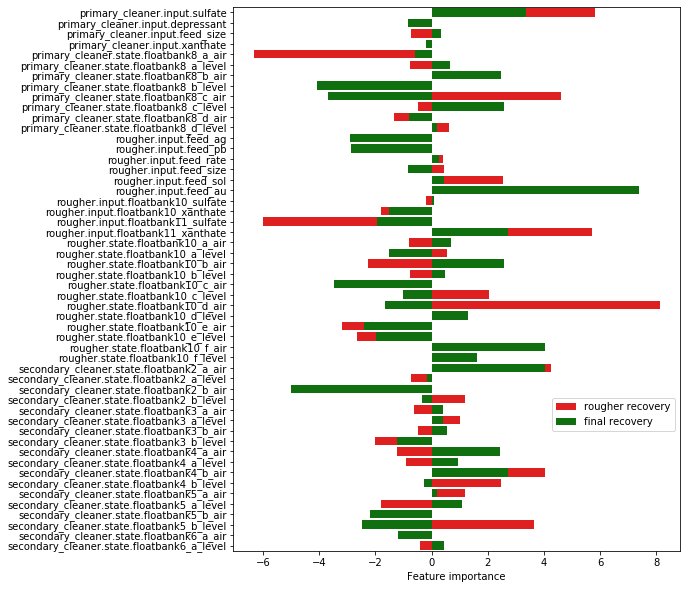

In [181]:
# visualise the coefficients for all the features
f, ax = plt.subplots(figsize=(8, 10))
#plt.figure(figsize=(8, 10))
sns.barplot(x="rougher.output.recovery_coef", y="feature", data=coef_data, label="rougher recovery", color="r")
sns.barplot(x="final.output.recovery_coef", y="feature", data=coef_data, label="final recovery", color="g")
ax.set(ylabel="", xlabel="Feature importance")
ax.legend(ncol=1, loc="right", bbox_to_anchor=(1, 0.25), frameon=True)
plt.show();

* Earlier when we checked multicollinearity, we got "off the scale" VIF ratios for the input variables below, suggesting that they should be removed for the fear of poor model performance in production. However, verifying against the chart of feature importance, all the variables show enough importance that it does not seem recommendable to remove them:
<br>o 'primary_cleaner.state.floatbank8_a_air': has a weak to very strong negative effect on both output variables. 
<br>o 'primary_cleaner.state.floatbank8_b_level': has a weak negative effect on the final recovery, and compared to other input variables, the scale of the effect is not negligible. 
<br>o 'primary_cleaner.state.floatbank8_b_air': has a strong positive effect on the final recovery. 
<br>o 'primary_cleaner.state.floatbank8_a_level': has a very weak positive effect on the final recovery, and a very weak negative effect on the rougher recovery. But the effects are still not zero, and there are input variables that have an even less effect than this variable. 
<br>o 'rougher.state.floatbank10_c_level': has a very weak positive effect on the rougher recovery, and a very weak negative effect on the final recovery. But the effects are still not zero, and there are input variables that have an even less effect than this variable. 
<br>o 'primary_cleaner.state.floatbank8_c_level': has a weak positive effect on the final recovery, and a very weak negative effect on the rougher recovery. But the effects are still not zero, and there are input variables that have an even less effect than this variable. 


* The input variables below are deemed unimportant with a '0' assigned to their coefficient. Some of them are hard to believe that they do not affect the recovery rates since they are the very chemical agents that galvanise the gold extraction process (e.g. [1], [2], [3]):
<br>o 'primary_cleaner.input.depressant' 
<br>o 'primary_cleaner.input.feed_size'
<br>o 'primary_cleaner.input.xanthate' [1]
<br>o 'rougher.input.feed_ag'
<br>o 'rougher.input.feed_pb'
<br>o 'rougher.input.floatbank10_sulfate' [2]
<br>o 'rougher.input.floatbank10_xanthate' [3]
<br>o 'secondary_cleaner.state.floatbank6_a_air'


We reduced the number of columns in the training dataset from 87 to 52. We will be trying out regression as well as tree models, all of which are (said by the experts to be) immune to multicollinearity by nature, so let us not remove any of the input variables. 

<div class="alert alert-info" role="alert">
<b>Question</b>

I read that the coefficients of a linear regression have different units of measurements, and can only be compared with one another by multiplying them by standard deviation, which is why I did what I did.  

Please let me know if it is correct to:
* apply standard deviation in compiling a list of feature importance from a list of linear regression coefficients, and
* verify the result of multicollinearity check against the list of feature importance in the way I did.
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Considering that you applied standard scaling to your data, all features should have mean 0 and standard deviation 1, so multiplying by standard deviation should do nothing. Applying standard scaling is usually exactly what is done to make sure that the model coefficients take into account the difference of scales of the features, so there's no need to do anything further!
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

I understand. I have removed the step of multiplying the feature coefficients by their standard deviations. 
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>

Ok!
	  
</div>

## Analyze the data <a class="anchor" id="chapter3"></a>

[Go back to the Table of Contents](#table_of_contents)

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage <a class="anchor" id="section3_1"></a>

[Go back to the Table of Contents](#table_of_contents)

These are components 1, 3, 5 and 8 in the flowchart.

In [182]:
# gold concentrations in the order of the purification stages
concentrations_au = raw[['rougher.input.feed_au', 'rougher.output.concentrate_au', \
                         'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
# silver
concentrations_ag = raw[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', \
                         'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
# lead
concentrations_pb = raw[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', \
                         'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

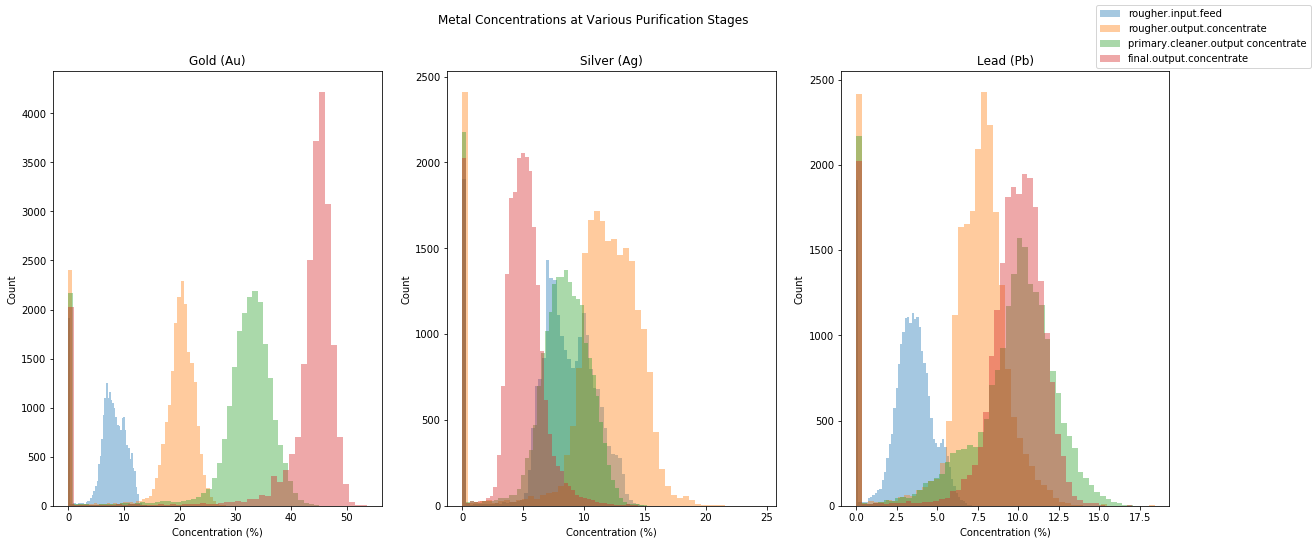

In [183]:
# visualise the fluctuation in the metal concentrations through the process
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# use distplot (not histplot) and plot in columns to get different colours
for column in list(concentrations_au):
    # disable the Kernel Density Estimation (KDE)
    sns.distplot(concentrations_au[column], kde=False, ax=ax[0])
ax[0].set(title="Gold (Au)", xlabel="Concentration (%)", ylabel="Count")

for column in list(concentrations_ag):
    sns.distplot(concentrations_ag[column], kde=False, ax=ax[1])
ax[1].set(title="Silver (Ag)", xlabel="Concentration (%)", ylabel="Count")

for column in list(concentrations_pb):
    sns.distplot(concentrations_pb[column], kde=False, ax=ax[2])
ax[2].set(title="Lead (Pb)", xlabel="Concentration (%)", ylabel="Count")

fig.suptitle("Metal Concentrations at Various Purification Stages")
fig.legend(["rougher.input.feed", "rougher.output.concentrate", "primary.cleaner.output concentrate", "final.output.concentrate"])
fig.show();

* Gold
<br>o The concentration increases steadily in big steps as the gold mixture is refined through the purification stages. 
<br>o There are data points around 0% concentration at all four stages. These seem to be records of errors where no measurements were taken. 


* Silver
<br>o During the early half of the process, the concentration increases. During the latter half of the process, the concentration decreases.
<br>o There are data points around 0% concentration at all four stages. These seem to be records of errors where no measurements were taken. Since the count is similar to the graph for gold, it is possible that the same records in the dataset suffered from measurement errors for gold and silver. 


* Lead
<br>o During the first three stages, the concentration increases steadily in big steps. In the last stage, the concentration stays more or less the same as the third stage.
<br>o There are data points around 0% concentration at all four stages. Due to the similarity in numbers, probably there was some technical issue on those particular days and hours when taking measurements for all three metals. These data points should probably be removed since they do not contribute to predicting the gold recovery rate. 

<div class="alert alert-info" role="alert">
<b>Question</b>

I based my answer on the full raw dataset with no imputation in the missing values so we can look at all the data in one go. Also, I could not use the training dataset since the output variables were removed.

Please let me know if it would have been more correct to take the original training dataset before we removed the output variables (which should be reflecting the data distribution in the raw dataset anyway). 
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment</b>
	
Great, you confirmed that the processing indeed makes the gold concentration increase!
    
Well, it would be more appropriate to use the train set, but I guess there's not much harm in using the full dataset here. Removing the columns that are not present in the test set could be done after this part, just before modeling.
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

I have understood the timing for when to "repair" the training dataset. Thank you. 
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Great!
	  
</div>

### Compare the feed particle size distributions in the training set and in the test set <a class="anchor" id="section3_2"></a>

If the distributions vary significantly, the model evaluation will be incorrect.

The particle size is measured at two stages: before Flotation and before the primary cleaner process stage. Let us compare them between the training and test datasets. 

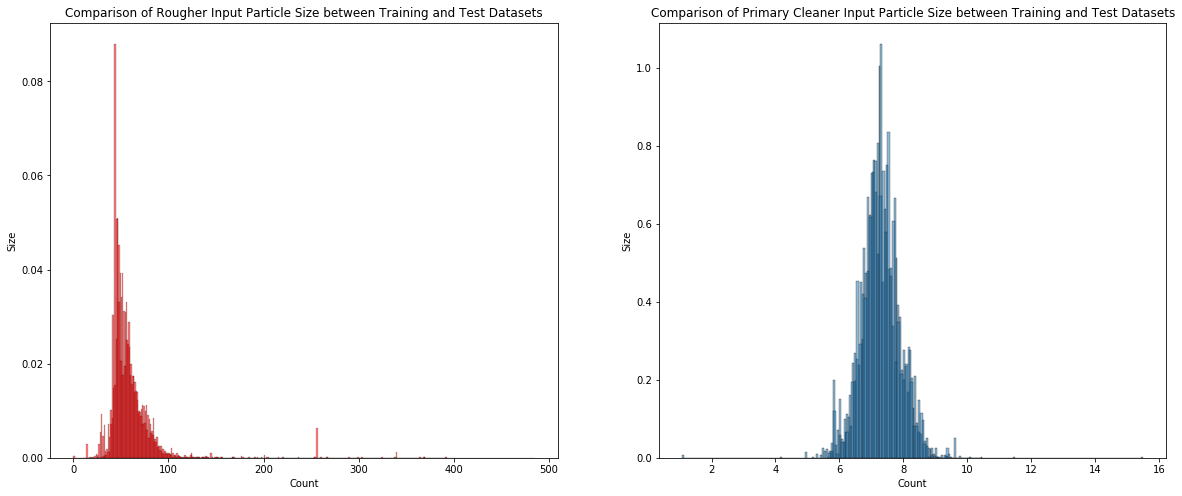

In [184]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))
#plt.style.use('ggplot') # makes plot looks much nicer
sns.histplot(data=train_no_missvals, x='rougher.input.feed_size', stat='density', ax=ax[0], color='r', alpha=0.5)
sns.histplot(data=test_no_missvals, x='rougher.input.feed_size', stat='density', ax=ax[0], color='r', alpha=0.5)
ax[0].set(title="Comparison of Rougher Input Particle Size between Training and Test Datasets", xlabel="Count", ylabel="Size")

sns.histplot(data=train_no_missvals, x='primary_cleaner.input.feed_size', stat='density', ax=ax[1], alpha=0.5)
sns.histplot(data=test_no_missvals, x='primary_cleaner.input.feed_size', stat='density', ax=ax[1], alpha=0.5)
ax[1].set(title="Comparison of Primary Cleaner Input Particle Size between Training and Test Datasets", xlabel="Count", ylabel="Size")

plt.show();

* Both types of feed particle size distributions look very similar in the training and test datasets, so there is a good chance that the model evaluation will be correct. 
* The rougher input particle size distribuion is skewed to the right. It seems that there are outliers. The x-axis also extends as far as 500. 

<div class="alert alert-info" role="alert">
<b>Note</b>

In this project, I understand that we are to assume that these distributions are similar to each other since they are visually similar, though they belong to different distributions according to a statistical test. 
   
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Yeah, I don't think the author considered that anyone would do statistical tests in this project :)
	  
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
One small detail: to compare distributions, it's better to use densities, rather than counts (in `histplot()` this is easily achieved by `stat='density'` parameter)
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

I have added above the parameter, stat='density', to turn the histograms into density histograms. I understand that frequency histograms often mess up a continuous variable's distribution because the frequency of values falling within particular intervals is very sensitive to the intervals' bounds. To take the interval length into account, display frequency not as the height of a column, but as its area.
    

<br>...and below, I added the two-sample Kolmogorov-Smirnov test. Both the rougher and primary cleaner values are so different from each other in the training and test datasets that the p-values are microscopic. 
    
We know that all four samples were taken from one and the same raw dataset, so how can this be happening? The industry professionals will never accept a machine learning model based on such disitrbutions. What do we do in such a case in a real world scenario? 
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Yeah, well, I guess the distribution are roughly the same if we judge by the distribution plots, but not to the degree that it could be confirmed by a statistical test. Which, again, seems to be an oversight by the authors of the project, who seemingly never considered that you would do a statistical test :)
    
Yeah, well, the samples are taken from the same dataset, but it very well may happen that the distribution in the samples is not the same, even if the samples are random. For example consider a bag with an N blue balls and N red balls, we take two samples (without replacement) of size N. It very well may happen that the first sample will have N blue balls and the second — N red balls.
    
What do we do in such cases? Just make a different split into train and test and make sure that the distributions of features and targets in the train set and the test set are similar.
	  
</div>

**Addendum - Statistical test to check the two distributions**

Check if there is a statistically significant difference between the rougher feed particle size distributions in the training set and in the test set.

* H0 = "The two come from the same distribution."
* H1 = "The two come from different distributions."

In [185]:
# prepare the 'rougher.input.feed_size' sample from the training and test datasets
rougher_train = train_no_missvals['rougher.input.feed_size']
rougher_test = test_no_missvals['rougher.input.feed_size']

# use the Kolmogorov-Smirnov test to check if the two samples are drawn from the same distribution
print("p-value:", st.ks_2samp(rougher_train, rougher_test, alternative='two-sided', mode='auto')[1])

p-value: 7.140386349808265e-129


The p-value is smaller than 0.05. We can reject the null hypothesis since there is a statistically significant difference between the two distributions. The two samples are not similar despite being drawn from the same raw dataset.

Check if there is a statistically significant difference between the primary cleaner feed particle size distributions in the training set and in the test set.

* H0 = "The two come from the same distribution."
* H1 = "The two come from different distributions."

In [186]:
# prepare the 'rougher.input.feed_size' sample from the training and test datasets
primary_cleaner_train = train_no_missvals['primary_cleaner.input.feed_size']
primary_cleaner_test = test_no_missvals['primary_cleaner.input.feed_size']

# apply the Mann-Whitney test to see if there is a statistically significant difference between the two samples
print("p-value:", st.ks_2samp(primary_cleaner_train, primary_cleaner_test)[1])

p-value: 7.530000629265788e-08


The p-value is smaller than 0.05. We can reject the null hypothesis since there is a statistically significant difference between the two distributions. The two samples are not similar despite being drawn from the same raw dataset.

### Consider the total concentrations of all substances at different stages <a class="anchor" id="section3_3"></a>

raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

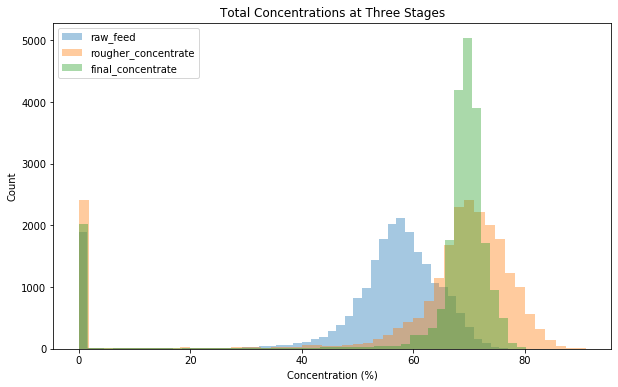

In [187]:
# calculate the totals for each stage
raw['raw_feed'] = raw['rougher.input.feed_au'] + raw['rougher.input.feed_ag'] + raw['rougher.input.feed_pb'] + raw['rougher.input.feed_sol']
raw['rougher_concentrate'] = raw['rougher.output.concentrate_au'] + raw['rougher.output.concentrate_ag'] + raw['rougher.output.concentrate_pb'] + raw['rougher.output.concentrate_sol']
raw['final_concentrate'] = raw['final.output.concentrate_au'] + raw['final.output.concentrate_ag'] + raw['final.output.concentrate_pb'] + raw['final.output.concentrate_sol']

# plot the total concentrations of all substances at three stages
plt.figure(figsize=(10, 6))
sns.distplot(raw['raw_feed'], kde=False, label='raw_feed')
sns.distplot(raw['rougher_concentrate'], kde=False, label='rougher_concentrate')
sns.distplot(raw['final_concentrate'], kde=False, label='final_concentrate')
plt.title("Total Concentrations at Three Stages")
plt.xlabel("Concentration (%)")
plt.ylabel("Count")
plt.legend()
plt.show();

* There are data points around 0% concentration at all three stages. Due to the similarity in the count, probably there was some technical issue on those particular days and hours in the three measurements. 

* These data points should be removed from the training and test datasets since they do not contribute to learning or predicting the gold recovery rate. However, all the output variables were removed from the training dataset earlier to match the shape of the test dataset, so the rougher concentrate and final concentrate related variables are irrelevant. 

<br>Let us check if there are data points around 0% concentration in the raw feed related variables.

In [188]:
# make a list of 'date' indices where raw feed, rougher concentrate and final concentrate all show 0% concentration
zero_concentrations = raw.loc[(raw['raw_feed'] == 0) & (raw['rougher_concentrate'] == 0) & (raw['final_concentrate'] == 0), 'date']

# remove the data points at 0% concentration from the training and test datasets by indexing the rows explicitly
train_zero_concentrations = train_no_missvals[~train_no_missvals['date'].isin(zero_concentrations)]
print(train_zero_concentrations.shape)
test_zero_concentrations = test_no_missvals[~test_no_missvals['date'].isin(zero_concentrations)]
print(test_zero_concentrations.shape)

(15807, 55)
(5229, 55)


* Neither the training nor the test dataset contains rows where raw feed, rougher concentrate and final concentrate all show 0% concentration.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Abnormal values were detected and removed
	  
</div>

## Build the model <a class="anchor" id="chapter4"></a>

First, let us prepare two sets of training and test datasets, one as is and another scaled. 

In [208]:
# = Datasets "as is" =
# take the latest training and test datasets and separate the feature and target variables
X_train = train_zero_concentrations.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)
y_train = train_zero_concentrations[['rougher.output.recovery', 'final.output.recovery']]

X_test = test_zero_concentrations.drop(['date', 'final.output.recovery', 'rougher.output.recovery'], axis=1)
y_test = test_zero_concentrations[['rougher.output.recovery', 'final.output.recovery']]


# = Datasets "scaled" =
# standardise the feature variables in the training and test datasets
scaler = StandardScaler()
scaler.fit(X_train) 

# the apply the transformation to the training and test datasets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Write a function to calculate the final sMAPE value <a class="anchor" id="section4_1"></a>

The components for calculating the symmetric Mean Absolute Percentage Error (sMAPE) are as below:
<br>o y_i = 'rougher.output.recovery', 'final.output.recovery'
<br>o y_hat = 'rougher_recovery', 'final_recovery'
<br>o big_n = train.shape[0]

In [190]:
# write a function that calculates the symmetric Mean Absolute Percentage Error (sMAPE)
def smape(y_i, y_hat):
    return np.nanmean((np.abs(y_i - y_hat) / ((np.abs(y_i) + np.abs(y_hat)) / 2)))

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
SMAPE function is correct
	  
</div>

In [191]:
# build a constant model as a benchmark. It predicts the mean value in the two target variables for each observation
constant_preds = pd.DataFrame(index=range(len(y_test)), columns=['rougher.output.recovery', 'final.output.recovery'])
constant_preds['final.output.recovery'] = y_train.mean()['final.output.recovery']
constant_preds['rougher.output.recovery'] = y_train.mean()['rougher.output.recovery']
constant_preds.head()

,rougher.output.recovery,final.output.recovery
0,81.635809,66.87444
1,81.635809,66.87444
2,81.635809,66.87444
3,81.635809,66.87444
4,81.635809,66.87444


In [192]:
# assess the baseline performance for rougher.output.recovery in terms of sMAPE
print('sMAPE - rougher recovery:', smape(y_test.values[:,0], constant_preds.values[:,0]))

sMAPE - rougher recovery: 0.11208634693418477


In [193]:
# assess the baseline performance for final.output.recovery in terms of sMAPE
print('sMAPE - final recovery:', smape(y_test.values[:,1], constant_preds.values[:,1]))

sMAPE - final recovery: 0.0953077849439393


In [194]:
# calculate the final sMAPE value
constant_final_smape = 0.25 * 0.11208634693418477 + 0.75 * 0.0953077849439393
constant_final_smape

0.09950242544150066

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Great, there is a simple constant baseline!
	  
</div>

* The models are expected to achieve at least this score. 

In [209]:
# convert the dataframes/series into arrays
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [196]:
# write a function that calculates the final sMAPE
def final_smape(y_i, y_pred):
    smape_rougher = smape(y_i[:,0], y_pred[:,0])
    smape_final = smape(y_i[:,1], y_pred[:,1])
    return 0.25 * smape_rougher + 0.75 * smape_final

In [197]:
def cv_smape(model, f_set, t_set):
    smape_score = make_scorer(final_smape)

    # force the scores to be positive
    print('Mean final sMAPE:', np.abs(np.nanmean(cross_val_score(model, f_set, t_set, scoring=smape_score, cv=5))))

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
It's great that you use a SMAPE scorer for cross-validation
	  
</div>

### Train different models <a class="anchor" id="section4_2"></a>

This project is a multi-output regression problem. We will test some regression machine learning algorithms that support multiple output directly.

* LinearRegression
* KNeighborsRegressor
* DecisionTreeRegressor
* RandomForestRegressor


Evaluate them using cross-validation. Pick the best model and test it using the test sample.

* **Linear Regression**

In [210]:
# create an instance of the model and fit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# evaluate the model using cross validation and collect the scores
cv_smape(lr_model, X_train, y_train)

Mean final sMAPE: 0.15551590220965766


In [77]:
# create an instance of the model and fit
#lr_model = LinearRegression()
#lr_model.fit(X_train_scaled, y_train)

# evaluate the model using cross validation and collect the scores
#cv_smape(lr_model, X_train_scaled, y_train)

Mean final sMAPE: 0.1555159022096587


Our ultimate goal is to build a machine learning model that will generalise to an unseen dataset, so preventing data leakage during the cross validation is important. 

We need to apply feature scaling only to the training dataset temporarily created during cross validation and avoid scaling to the temporarily created validation dataset.

In [225]:
# check if the model performs better if the dataset is scaled
# create a pipeline to perform feature scaling at the correct timing during cross evaluation
lr_pipe = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('model', LinearRegression()) # create an instance of the model
])

# evaluate the model using cross validation and collect the scores
cv_smape(lr_pipe, X_train, y_train)

Mean final sMAPE: 0.15551590220965875


<div class="alert alert-warning">
<b>Reviewer's comment</b>
	  
Using a pre-scaled dataset for cross-validation is not quite correct, because in each cross-validation fold, the train set will have some implicit knowledge about the validation set (because the mean and standard deviation used to do the scaling were calculated on the whole dataset). A better way is to use [pipelines](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) (you can find an example in the linked page)
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

I introduced a pipeline in order to be able to perform feature scaling at the correct timing during cross validation. 
    
<br>I understand that cross validation does not fit the model, so if a model is found to do better on a scaled dataset and therefore should be tested on the scaled test dataset, then it should be fitted after it is cross-validated. But this is not the case with this Linear Regression model here, so I did not do that.
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Sorry, I didn't quite get your point. After cross-valdation, to evaluate the pipeline on the test set, you can just fit the pipeline on the train set, and then make predictions on the test set, nothing wrong with that!
    
```python
lr_pipe.fit(X_train, y_train)
final_smape(y_test, lr_model.predict(X_test))
```
	  
</div>

* The scaled training dataset had no effect. 

So we will evaluate the model on the test dataset that has not been scaled. We can use lr_model which is already fitted. 

In [213]:
# test the model on the test dataset that has not been scaled
final_smape(y_test, lr_model.predict(X_test))

0.09295011263951176

* The model outdid the benchmark only on the training dataset that was not scaled.

* **KNeighborsRegressor**

In [80]:
for k in range(800, 1000, 50):
    print('neighbours:', k)
    # create an instance of the model and fit
    kn_model = KNeighborsRegressor(n_neighbors=k)
    kn_model.fit(X_train, y_train)

    # evaluate the model using cross validation and collect the scores
    cv_smape(kn_model, X_train, y_train)

neighbours: 800
Mean final sMAPE: 0.1330069581099709
neighbours: 850
Mean final sMAPE: 0.13285900300868636
neighbours: 900
Mean final sMAPE: 0.13286232117930846
neighbours: 950
Mean final sMAPE: 0.13296003557514174


In [81]:
# create an instance of the model and fit
kn_model = KNeighborsRegressor(n_neighbors=850)
kn_model.fit(X_train, y_train)

# evaluate the model using cross validation and collect the scores
cv_smape(kn_model, X_train, y_train)

Mean final sMAPE: 0.13285900300868636


In [82]:
# create an instance of the model and fit
#kn_model = KNeighborsRegressor(n_neighbors=850)
#kn_model.fit(X_train_scaled, y_train)

# evaluate the model using cross validation and collect the scores
#cv_smape(kn_model, X_train_scaled, y_train)

Mean final sMAPE: 0.1295457482065711


<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

I introduced a pipeline in order to be able to perform feature scaling at the correct timing during cross validation.

<br>Since the model did better on the scaled training dataset, I fitted the model first then fed the scaled test dataset. 
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>

Well, the cool thing about the pipeline is that it works correctly with train/test as well. So if you fit the pipeline on the train set like this:
    
```python
kn_pipe = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('model', KNeighborsRegressor(n_neighbors=850)) # create an instance of the model
]) 
kn_pipe.fit(X_train, y_train)
```
    
It will scale the train data automatically before fitting the model on it. And then, when you call `kn_pipe.predict(X_test)` it will also correctly scale the test data (using the statistics learned on the train data).
    
So it is not necessary to do scale the data before feeding it to the pipeline with a standard scaler (it's not a big problem though, because after standard scaling is applied, the data has `mean = 0`, and `standard deviation = 1`, so applying standard scaling the second time does nothing).

    
    
</div>

In [229]:
# create a pipeline to perform feature scaling and train the model on a scaled training dataset
kn_pipe = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('model', KNeighborsRegressor(n_neighbors=850)) # create an instance of the model
])

# evaluate the model using cross validation and collect the scores
cv_smape(kn_pipe, X_train, y_train)

Mean final sMAPE: 0.12931850329826527


* The model performs better slightly on the scaled training dataset.

In [215]:
# test the model on the test dataset that has not been scaled
final_smape(y_test, lr_model.predict(X_test))

0.09295011263951176

In [230]:
# fit the model
kn_pipe.fit(X_train_scaled, y_train)

# test the model on the test dataset that has not been scaled
final_smape(y_test, kn_pipe.predict(X_test_scaled))

0.0925250803927789

* The model outdid the benchmark and its performance was better when the test dataset was scaled. 

* **DecisionTreeRegressor**

In [283]:
# create an instance of the model and fit
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# evaluate the model using cross validation and collect the scores
dt_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
dt_n_scores = cross_val_score(dt_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=dt_cv, n_jobs=-1)
dt_n_scores = absolute(dt_n_scores) # force the scores to be positive
print('MAE: %.3f (std=%.3f)' % (mean(dt_n_scores), std(dt_n_scores)))

MAE: 5.474 (std=0.238)


In [84]:
for depth in range(50, 500, 50):
    print('max_depth:', depth)
    # create an instance of the model and fit
    dt_model = DecisionTreeRegressor(max_depth=depth, random_state=12345)
    dt_model.fit(X_train, y_train)

    # evaluate the model using cross validation and collect the scores
    cv_smape(dt_model, X_train, y_train)

max_depth: 50
Mean final sMAPE: 0.3345922122260757
max_depth: 100
Mean final sMAPE: 0.33519440303200704
max_depth: 150
Mean final sMAPE: 0.33519440303200704
max_depth: 200
Mean final sMAPE: 0.33519440303200704
max_depth: 250
Mean final sMAPE: 0.33519440303200704
max_depth: 300
Mean final sMAPE: 0.33519440303200704
max_depth: 350
Mean final sMAPE: 0.33519440303200704
max_depth: 400
Mean final sMAPE: 0.33519440303200704
max_depth: 450
Mean final sMAPE: 0.33519440303200704


In [204]:
# create an instance of the model and fit
dt_model = DecisionTreeRegressor(max_depth=50, random_state=12345)
dt_model.fit(X_train, y_train)

# evaluate the model using cross validation and collect the scores
cv_smape(dt_model, X_train, y_train)

Mean final sMAPE: 0.3345922122260757


In [86]:
# create an instance of the model and fit
#dt_model = DecisionTreeRegressor(max_depth=50, random_state=12345)
#dt_model.fit(X_train_scaled, y_train)

# evaluate the model using cross validation and collect the scores
#cv_smape(dt_model, X_train_scaled, y_train)

Mean final sMAPE: 0.30738014848275175


<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

I introduced a pipeline in order to be able to perform feature scaling at the correct timing during cross validation.

    
<br>Since the model performed worse with the scaled training dataset, I did not evaluate the model's performance on the scaled test dataset. 
</div>

In [231]:
# create a pipeline
dt_pipe = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('model', DecisionTreeRegressor(max_depth=50, random_state=12345)) # create an instance of the model
])

# evaluate the model using cross validation and collect the scores
cv_smape(dt_pipe, X_train, y_train)

Mean final sMAPE: 0.3379435790702866


In [218]:
# test the model on the test dataset that has not been scaled
final_smape(y_test, dt_model.predict(X_test))

0.1557866917425721

* The model's performance score did not achieve the benchmark of the constant model.

<div class="alert alert-info" role="alert">
<b>Question</b>

For some reason, I just cannot get sMAPE figures in the decision tree model. The sMAPE scores for rougher.output.recovery and final.output.recovery are both NaN. There is no problem with the straightforward MAE.
    
<br>It will be most helpful if you could you point out what I am doing wrong. 
    
</div>

<div class="alert alert-danger">
<s><b>Reviewer's comment</b>
	  
Hmm, interesting that this only happened with `DecisionTreeRegressor`. This might be the result of both prediction and target being equal to 0 (so as a result of division by 0 in the SMAPE formula we get a NaN). You can try using `np.nanmean()` instead of regular mean
	  
</div>

<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

Thank you! np.nanmean() did it. 
    
</div>

<div class="alert alert-success">
<b>Reviewer's comment V2</b>
	  
Awesome!
	  
</div>

* **RandomForestRegressor**

In [303]:
# create an instance of the model and fit
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# evaluate the model using cross validation and collect the scores
rf_cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
rf_n_scores = cross_val_score(rf_model, X_train, y_train, scoring='neg_mean_absolute_error', cv=rf_cv, n_jobs=-1)
rf_n_scores = absolute(rf_n_scores) # force the scores to be positive
print('MAE: %.3f (std=%.3f)' % (mean(rf_n_scores), std(rf_n_scores)))

MAE: 4.201 (std=0.165)


In [304]:
for estimator in range(10, 51, 10):
    print('n_estimators:', estimator)
    # create an instance of the model and fit
    rf_model = RandomForestRegressor(n_estimators=estimator, random_state=12345)
    rf_model.fit(X_train, y_train)

    # evaluate the model using cross validation and collect the scores
    cv_smape(rf_model, X_train, y_train)

n_estimators: 10
Final sMAPE: 0.1554110509363266
n_estimators: 20
Final sMAPE: 0.15420157667323156
n_estimators: 30
Final sMAPE: 0.1555336840715357
n_estimators: 40
Final sMAPE: 0.15521323406443843
n_estimators: 50
Final sMAPE: 0.15352876912629637


In [221]:
# create an instance of the model and fit
rf_model = RandomForestRegressor(n_estimators=50, random_state=12345)
rf_model.fit(X_train, y_train)

# evaluate the model using cross validation and collect the scores
cv_smape(rf_model, X_train, y_train)

Mean final sMAPE: 0.15478065167724125


In [308]:
# create an instance of the model and fit
#rf_model = RandomForestRegressor(n_estimators=50, random_state=12345)
#rf_model.fit(X_train_scaled, y_train)

# evaluate the model using cross validation and collect the scores
#cv_smape(rf_model, X_train_scaled, y_train)

Final sMAPE: 0.1543035036218195


<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

I introduced a pipeline in order to be able to perform feature scaling at the correct timing during cross validation.

    
<br>Since the model performed better on the scaled training dataset, I fitted the model first then fed it the scaled test dataset. 
</div>

In [232]:
# create a pipeline
rf_pipe = Pipeline([
    ('scaler', StandardScaler()), # feature scaling
    ('model', RandomForestRegressor(n_estimators=50, random_state=12345)) # create an instance of the model
])

# evaluate the model using cross validation and collect the scores
cv_smape(rf_pipe, X_train, y_train)

Mean final sMAPE: 0.15517745217844606


In [234]:
# test the model on the test dataset that has not been scaled
final_smape(y_test, rf_model.predict(X_test))

0.10268429738526252

In [233]:
# fit the model
rf_pipe.fit(X_train_scaled, y_train)

# test the model on the test dataset
final_smape(y_test, rf_pipe.predict(X_test_scaled))

0.10377780149802195

* The model showed a better performance on the test dataset that was not scaled.
* The model did not score above the baseline set by the constant model.

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
Very good, you trained a couple of different models and tuned their hyperparameters using cross-validation. Final models were evaluated on the test set using our target metric
	  
</div>

**Provide findings.**

* Predict two target variables: 'rougher.output.recovery' and 'final.output.recovery'. The former refers to the amount of gold recovered from the concentrate after the flotation stage but before the primary purification stage. The latter refers to the amount of gold recovered from the concentrate after both the primary and secondary purification stages.

<br>o The Linear Regression model managed to exceed the baseline set by the constant model in terms of final sMAPE. 
<br>o Had the Linear Regression model been fine-tuned using regularization, it may have achieved an even better score. 
<br>o Scaling the dataset did help raise the model performance. 
<br>o With 850 neighbours, the KNeighborsRegressor model also managed to outdo the constant model's benchmark.
<br>o Again, the model performed better on the standardised dataset. 

We now have a model which can accept the 53 input variables and predict the 'rougher.output.recovery' and 'final.output.recovery' values. 

* Find the coefficient of each parameter in the equation that plots the best regression line that fits the real data to find the best combination of parameter coeffients that most efficiently extracts gold from gold ore.


Since KNN does not provide a prediction for the coefficients of variables, below is the list of coefficients from the Linear Regression model, which showed performance of an equal quality. 

<div class="alert alert-success">
<b>Reviewer's comment</b>
	  
The analysis looks good! 
	   
</div>

<div class="alert alert-info" role="alert">
<b>Student's comment v.2</b>

Mathematically, I can understand the meaning of coefficients (the size of effect with a direction), but in practice, how would a technician apply these positive and negative numbers to his gold extraction process? 
    
<br>How do you apply -0.049421 parts of 'secondary_cleaner.state.floatbank4_a_air' to achieve 1 part of 'rougher.output.recovery', for example?
    
</div>

<div class="alert alert-warning">
<b>Reviewer's comment V2</b>
	  
Sorry, but I'm not exactly sure about how this model would be applied in practice myself. Maybe you can try directing this question to your instructors?
	  
</div>

In [314]:
# create a dataframe for storing the coeffients
coef_data_final = coef_data.copy()
coef_data_final = coef_data_final.drop(['std', 'rougher_feature_importance', 'final_feature_importance'],axis=1)
coef_data_final['rougher.output.recovery_coef'] = lr_model.coef_[0]
coef_data_final['final.output.recovery_coef'] = lr_model.coef_[1]

# display the feature coefficients for 'rougher.output.recovery'
coef_data_final.sort_values(by='rougher.output.recovery_coef', ascending=False)

,feature,rougher.output.recovery_coef,final.output.recovery_coef
0,primary_cleaner.input.sulfate,4.685647,3.164264
21,rougher.input.floatbank11_xanthate,4.548375,2.923870
28,rougher.state.floatbank10_d_air,4.480462,-1.345536
34,secondary_cleaner.state.floatbank2_a_air,3.431046,3.859851
49,secondary_cleaner.state.floatbank5_b_level,3.369118,-0.750693
9,primary_cleaner.state.floatbank8_c_level,3.226086,1.358382
32,rougher.state.floatbank10_f_air,3.099187,4.103447
17,rougher.input.feed_au,3.081150,6.407361
44,secondary_cleaner.state.floatbank4_b_air,2.788654,1.409870
46,secondary_cleaner.state.floatbank5_a_air,2.358518,0.775212


In [315]:
# display the feature coefficients for 'final.output.recovery'
coef_data_final.sort_values(by='final.output.recovery_coef', ascending=False)

,feature,rougher.output.recovery_coef,final.output.recovery_coef
17,rougher.input.feed_au,3.081150,6.407361
32,rougher.state.floatbank10_f_air,3.099187,4.103447
34,secondary_cleaner.state.floatbank2_a_air,3.431046,3.859851
6,primary_cleaner.state.floatbank8_b_air,1.060487,3.211889
0,primary_cleaner.input.sulfate,4.685647,3.164264
21,rougher.input.floatbank11_xanthate,4.548375,2.923870
42,secondary_cleaner.state.floatbank4_a_air,-0.049421,2.317456
29,rougher.state.floatbank10_d_level,0.119290,1.529352
44,secondary_cleaner.state.floatbank4_b_air,2.788654,1.409870
9,primary_cleaner.state.floatbank8_c_level,3.226086,1.358382
